<a href="https://colab.research.google.com/github/simonsavine/school_projects/blob/main/basis_fun_reg/ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/simonsavine/school_projects.git

Cloning into 'school_projects'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 37 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 46.95 KiB | 739.00 KiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

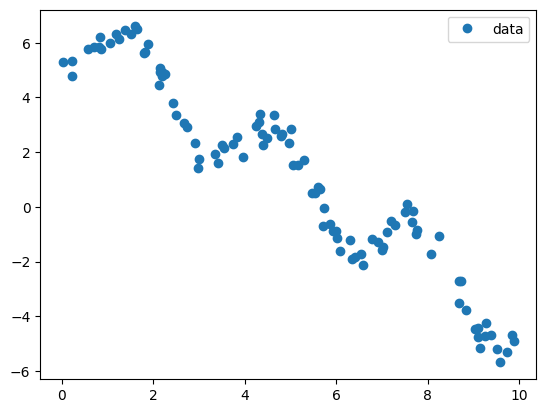

In [3]:
# load data
npdata = np.load("/content/school_projects/basis_fun_reg/FitData.npy")
xs, ys = npdata[:,0], npdata[:,1]
plt.plot(xs, ys, "o", label="data")
plt.legend()

In [4]:
# sort the data by ascending xs
# (necessary in order to plot a line)
idx = np.argsort(xs)
xs = xs[idx]
ys = ys[idx]

The 6 basis functions are:

*   $f_1(x) = 1$
*   $f_2(x) = x$
*   $f_3(x) = \sin(x)$
*   $f_4(x) = \cos(x)$
*   $f_5(x) = \sin(2x)$
*   $f_6(x) = \cos(2x)$






In [5]:
# create a matrix A of basis functions stacked in columns

def f1(x):
  return 1

def f2(x):
  return x

def f3(x):
  return np.sin(x)

def f4(x):
  return np.cos(x)

def f5(x):
  return np.sin(2*x)

def f6(x):
  return np.cos(2*x)

m = len(xs)
n = 6
A = np.zeros((m, n))
A[:, 0] = f1(xs)
A[:, 1] = f2(xs)
A[:, 2] = f3(xs)
A[:, 3] = f4(xs)
A[:, 4] = f5(xs)
A[:, 5] = f6(xs)

In [6]:
# check collinearity

# determinant is (significantly) different from 0, all good
print (f"determinant of A'A: {np.linalg.det(A.T @ A)}")
assert np.abs(np.linalg.det(A.T @ A)) > 1e-10

determinant of A'A: 397951630266.40533


In [7]:
# fit linear model y = A @ c

# first method: explicit instantiation of normal equation
c1 = np.linalg.inv(A.T @ A) @ A.T @ ys

# second method: call np.linalg.solve
# more efficient, see https://stackoverflow.com/questions/31256252/why-does-numpy-linalg-solve-offer-more-precise-matrix-inversions-than-numpy-li
c2 = np.linalg.solve(A.T @ A, A.T @ ys)

# ensure that the two are the same
assert np.allclose(c1, c2)
c = c1

# sanity check
assert c.shape == (n,)

# Dispplay it
c

array([ 6.69441211e+00, -1.10425245e+00,  2.41186210e-03,  3.85456384e-03,
        2.12476602e-02, -1.36482901e+00])

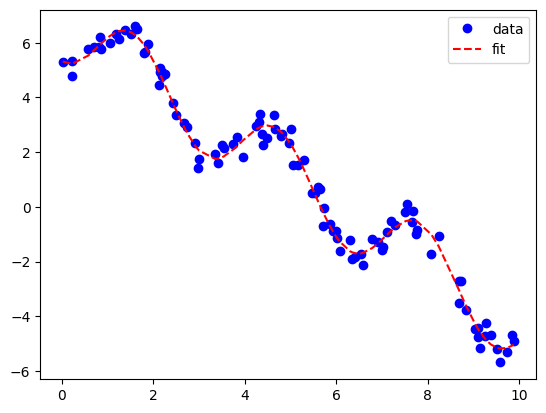

In [8]:
# predict with the fitted model
pred = A @ c

# plot the results
plt.plot(xs, ys, "bo", label="data")
plt.plot(xs, pred, "r--", label="fit")
plt.legend()

In [9]:
# measure fit quality
err = pred - ys
mse = np.mean(err**2)
rmse = np.sqrt(mse)
print (f"RMSE: {rmse}")
r2 = 1-mse/np.var(ys)
print (f"R^2: {r2}")

RMSE: 0.3302325933189421
R^2: 0.9909476262463497


Using basis functions $g_1(x) = 1, g_2(x) = x, g_3(x) = sin^2(x), g_4(x) = cos^2(x)$ is a bad idea because $sin^2(x) + cos^2(x) = 1$ for all x, hence $f_1 = f_3 + f_4$. Therefore, this set of functions is linearly redundant, as demonstrated below

In [10]:
def g1(x):
  return 1

def g2(x):
  return x

def g3(x):
  return np.sin(x)**2

def g4(x):
  return np.cos(x)**2

p = 4
B = np.zeros((m, n))
B[:, 0] = f1(xs)
B[:, 1] = f2(xs)
B[:, 2] = f3(xs)
B[:, 3] = f4(xs)

# determinant is 0, B is collinear
print (f"determinant of B'B: {np.linalg.det(B.T @ B)}")

determinant of B'B: 0.0
